## import needed libraries and packages

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import svm, datasets
import seaborn as sns
#-----------------------------------------------SVM---------------------------------------------------
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.datasets import make_classification, make_circles
#----------------------------------------------------perceptron---------------------------------
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.linear_model import Perceptron
#---------------------------------------------OVR------------------------------------------

from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')

## read the data from your local path

In [29]:
#-----------------Read the data ----------------------
train_data = pd.read_csv('/content/seeds_train.csv' , names=['feature_1','feature_5','classes'])  #replace the path with your own local path of train data
test_data = pd.read_csv('/content/seeds_test.csv',names=['feature_1','feature_5','classes'])       #replace the path with your own local path of test data
test_data.shape


(42, 3)

## partition and prepare the data

In [30]:
#Remove rows of the class 1 (Kama) in new copy of data 
C_train_data=train_data[train_data.iloc[:,2]!=1].reset_index()
C_train_data.drop(["index"],axis=1,inplace=True)
C_test_data= test_data[test_data.iloc[:,2]!=1].reset_index()
C_test_data.drop(["index"],axis=1,inplace=True)


#----------------------------------------------------------------------------------------------------------------------------
#---------partitioning orignal data into train&test--------------------------------
x_train = train_data.iloc[:,:2]
y_train =np.array( train_data.iloc [:,2])
x_test = np.array(test_data.iloc[:,:2])
y_test =(np.array( test_data.iloc [:,2])).tolist()
#---------partitioning the data after removing class 1 into train&test--------------------------------
x_train1 = C_train_data.iloc[:,:2]
y_train1 =np.array( C_train_data.iloc [:,2])
x_test1 = C_test_data.iloc[:,:2]
y_test1 =np.array( C_test_data.iloc [:,2])


## **for plotting**

In [31]:
#--------------------------------constracting the mesh grid to plot in --------------------------
def plotRegions(model,X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2) 
#-------------------------------------Plotting Boundaries-----------------------------------------------------
def plotData(features, labels, cls, class_names):
  colors = ['r', 'b', 'g']
  markers = ['o', '*', '+']
  for class_index in range(len(cls)):
    plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
  Title = "Seeds Dataset"
  plt.title(Title)
  plt.xlabel('First Feature')
  plt.ylabel('Fifth Feature')
  plt.legend()



## Main_Functions

In [32]:
#------------------------to get the accuuracy of any model for (ovo) classifiers-----------------------------
def getAccuracy(model, x_test, y_test):
  return model.score(x_test,y_test)*100

#--------------------------------fit with different models for (ovo) classifiers-------------------------
def fit_accuracy(model):
  model.fit(x_train1, y_train1)
  print('Accuracy of per_model: {:.2f}%'.format(getAccuracy(model, x_test1, y_test1)))
  y_true, y_pred = y_test1, model.predict(x_test1)
  print('\nClassification Report:\n')
  print(classification_report(y_true, y_pred))

  print('\nConfusion Matrix:\n')
  print(confusion_matrix(y_test1, y_pred))
  plot_confusion_matrix(model, x_test1, y_test1)  
  

#------------------------------------binarize the labels to achieve OVR & get results for every classifier-----------------------------
def main_fun (model_OVR , positive_clas , accur_SVC =False , accur_Per =False, result_graph=False , ytst = False , nfit =False  ):
  
  LB = preprocessing.LabelBinarizer(neg_label=-1, pos_label=1, sparse_output=False)
  LB.fit([positive_clas])
  ytrain_new = LB.transform(y_train)
  ytest_ew = LB.transform(y_test)

  ytest_w=[]
  for i in range(len(ytest_ew)):
    ytest_w.append(ytest_ew[i][0])
  ytest_new =np.array(ytest_w)
       
  OvR_clf =model_OVR.fit(x_train ,ytrain_new)               #fitteng the model with the approach of OVR
  y_pred = OvR_clf.predict(x_test)
  if accur_SVC ==True:
    y_pred_prob = OvR_clf.predict_proba(x_test)   #Return the predictions as probabilities
  #print(y_pred_prob)

  if accur_Per == True:
    clf_isotonic = CalibratedClassifierCV(model_OVR, cv=10, method='isotonic')
    clf_isotonic.fit(x_train, ytrain_new)
    y_pred_prob_2 = clf_isotonic.predict_proba(x_test)

  AC = 'Accuracy : {:.2f}%'.format(accuracy_score(ytest_new, y_pred)*100)
  #ac = accuracy_score(ytest_new, y_pred)

  y_true, y_pred = ytest_new, OvR_clf.predict(x_test)                #y_true & y_pred for each model
  CR = '\nClassification Report:\n'
  CR_graph = classification_report(y_true, y_pred)
  CM = '\nConfusion Matrix:\n'
  CM_graph =confusion_matrix(ytest_new, y_pred)
  

  if accur_SVC ==True : return y_pred_prob 
  elif accur_Per == True: return  y_pred_prob_2  
  elif result_graph == True: return print(CR) , print(CR_graph) , print(CM) , print(CM_graph), plot_confusion_matrix(OvR_clf,x_test,ytest_new), print(AC)  
  elif ytst ==True : return ytest_new  
  elif nfit ==True : return OvR_clf
  else: return print ("enter the parameter you need to show")
     
    

    

## ***One versis one (SVM & perceptron)***



Accuracy of per_model: 100.00%

Classification Report:

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        12

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29


Confusion Matrix:

[[17  0]
 [ 0 12]]


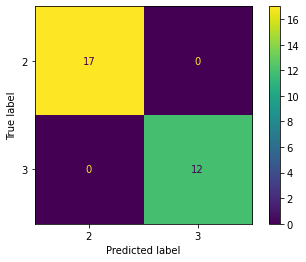

In [33]:
model_1 = svm.SVC(kernel='linear', decision_function_shape='ovo')  #Take an object from support vector machine model
model_2=Perceptron()                           # #Take an object from Perceptron model
fit_accuracy(model_1)                          #call the functoion that fit ovo and show the result of SVM


Accuracy of per_model: 82.76%

Classification Report:

              precision    recall  f1-score   support

           2       0.77      1.00      0.87        17
           3       1.00      0.58      0.74        12

    accuracy                           0.83        29
   macro avg       0.89      0.79      0.80        29
weighted avg       0.87      0.83      0.82        29


Confusion Matrix:

[[17  0]
 [ 5  7]]


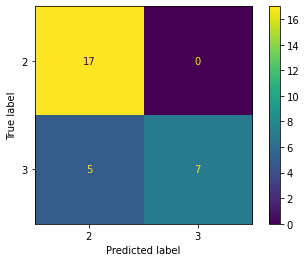

In [34]:
fit_accuracy(model_2)     ##call the functoion that fit ovo and show the result of Perceptron

## OVR (one vs Rest) SVM


Classification Report:

              precision    recall  f1-score   support

          -1       0.90      0.93      0.92        29
           1       0.83      0.77      0.80        13

    accuracy                           0.88        42
   macro avg       0.87      0.85      0.86        42
weighted avg       0.88      0.88      0.88        42


Confusion Matrix:

[[27  2]
 [ 3 10]]
Accuracy : 88.10%


(None,
 None,
 None,
 None,
 None)

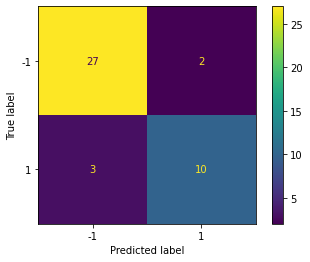

In [35]:
main_fun(model_1 ,1, result_graph = True)      #the main function in which you can pass the parameter
                                              # result_graph =True when you want to show the result of specific model with OVR approach


Classification Report:

              precision    recall  f1-score   support

          -1       1.00      0.96      0.98        25
           1       0.94      1.00      0.97        17

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42


Confusion Matrix:

[[24  1]
 [ 0 17]]
Accuracy : 97.62%


(None,
 None,
 None,
 None,
 None)

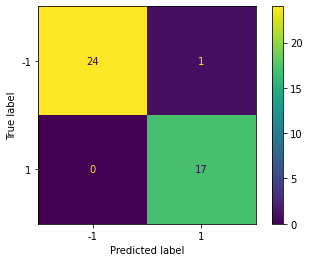

In [36]:
main_fun(model_1 ,2, result_graph = True)


Classification Report:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        12

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42


Confusion Matrix:

[[30  0]
 [ 0 12]]
Accuracy : 100.00%


(None,
 None,
 None,
 None,
 None)

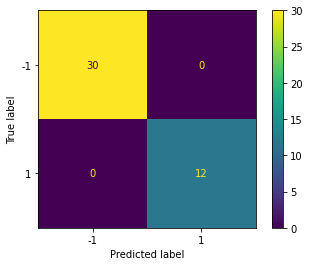

In [37]:
main_fun(model_1 ,3, result_graph = True)

## OVR(one vs Rest) Perceptron


Classification Report:

              precision    recall  f1-score   support

          -1       0.84      0.90      0.87        29
           1       0.73      0.62      0.67        13

    accuracy                           0.81        42
   macro avg       0.78      0.76      0.77        42
weighted avg       0.80      0.81      0.80        42


Confusion Matrix:

[[26  3]
 [ 5  8]]
Accuracy : 80.95%


(None,
 None,
 None,
 None,
 None)

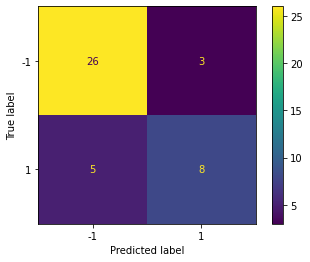

In [38]:
main_fun(model_2 ,1, result_graph = True)


Classification Report:

              precision    recall  f1-score   support

          -1       0.56      0.76      0.64        25
           1       0.25      0.12      0.16        17

    accuracy                           0.50        42
   macro avg       0.40      0.44      0.40        42
weighted avg       0.43      0.50      0.45        42


Confusion Matrix:

[[19  6]
 [15  2]]
Accuracy : 50.00%


(None,
 None,
 None,
 None,
 None)

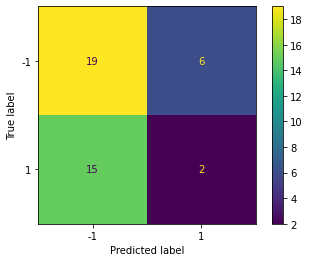

In [39]:
main_fun(model_2 ,2, result_graph = True)


Classification Report:

              precision    recall  f1-score   support

          -1       0.83      1.00      0.91        30
           1       1.00      0.50      0.67        12

    accuracy                           0.86        42
   macro avg       0.92      0.75      0.79        42
weighted avg       0.88      0.86      0.84        42


Confusion Matrix:

[[30  0]
 [ 6  6]]
Accuracy : 85.71%


(None,
 None,
 None,
 None,
 None)

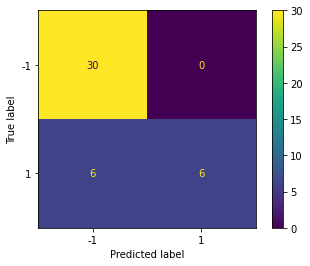

In [40]:
main_fun(model_2 ,3, result_graph = True)

## **Desition_Boundaries**

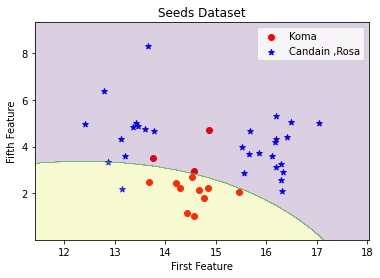

In [41]:
#------------------------------------------------------decision boundary for SVM  Classifier 1---------------------------------------------------------------------------------------------------------
plotData(x_test,main_fun(SVC(),1,ytst=True),[1,-1], {1: 'Koma', -1: 'Candain ,Rosa'});
plotRegions(main_fun(SVC(),1,nfit=True), x_test)   # here i passed this parameter (nfit=true) to get the model after fitting from my own main function

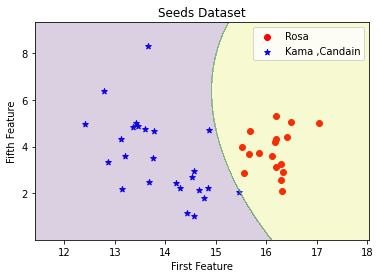

In [42]:
#------------------------------------------------------decision boundary for SVM  Classifier 2---------------------------------------------------------------------------------------------------------
plotData(x_test,main_fun(SVC(),2,ytst=True),[1,-1], {1: 'Rosa', -1: 'Kama ,Candain'})
plotRegions(main_fun(SVC(),2,nfit=True), x_test)

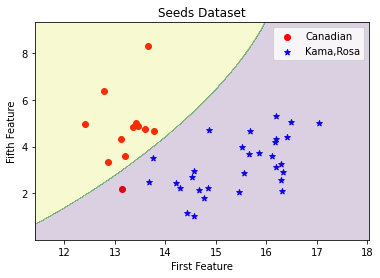

In [43]:
#------------------------------------------------------decision boundary for SVM  Classifier 3---------------------------------------------------------------------------------------------------------
plotData(x_test,main_fun(SVC(),3,ytst=True),[1,-1], {1: 'Canadian', -1: 'Kama,Rosa'})
plotRegions(main_fun(SVC(),3,nfit=True), x_test)

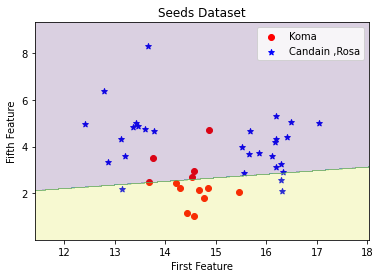

In [44]:
#------------------------------------------------------decision boundary for perceptron Classifier1---------------------------------------------------------------------------------------------------------
plotData(x_test,main_fun(Perceptron(),1,ytst=True),[1,-1], {1: 'Koma', -1: 'Candain ,Rosa'});
plotRegions(main_fun(Perceptron(),1,nfit=True), x_test)

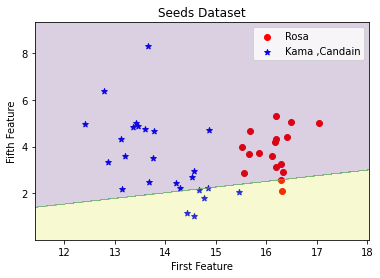

In [45]:
#------------------------------------------------------decision boundary for perceptron Classifier2---------------------------------------------------------------------------------------------------------
plotData(x_test,main_fun(Perceptron(),2,ytst=True),[1,-1], {1: 'Rosa', -1: 'Kama ,Candain'})
plotRegions(main_fun(Perceptron(),2,nfit=True), x_test)

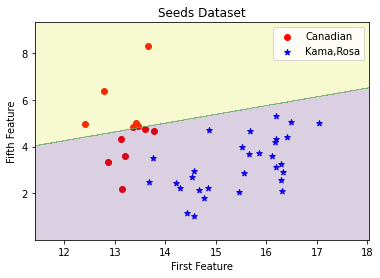

In [46]:
#------------------------------------------------------decision boundary for perceptron Classifier3---------------------------------------------------------------------------------------------------------
plotData(x_test,main_fun(Perceptron(),3,ytst=True),[1,-1], {1: 'Canadian', -1: 'Kama,Rosa'})
plotRegions(main_fun(Perceptron(),3,nfit=True), x_test)

# get the prediction probability for each model (ArgMax)

42
<class 'numpy.ndarray'>
Accuracy = 92.86%
[[11  2  0]
 [ 0 17  0]
 [ 1  0 11]]


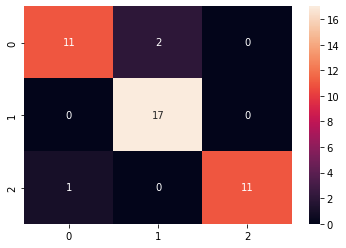

In [47]:
#------------------aplling argmax to combine the three models of SVM--------------------------------------
y_prob1 = main_fun(SVC(probability=True) , 1 , accur_SVC = True)[:,1]  # here passing the parameter (accur_SVC) to return the output of pridict_prob function inside the main function
y_prob2 = main_fun( SVC(probability=True) , 2 , accur_SVC = True)[:,1]
y_prob3 = main_fun(SVC(probability=True) , 3 , accur_SVC = True)[:,1]
print(len(y_prob3))
print(type(y_prob1))
# xx=y_prb1.tolist()
# print(xx)
pred_classes = []
for i in range(len(y_prob1)):
  index = np.argmax([y_prob1[i],y_prob2[i],y_prob3[i]])
  tru_inex = index +1
  pred_classes.append(tru_inex)
# print((pred_classes))
# print(np.array(y_test))

#----calculate the accuracy of the 3_binary classifiers of SVM---------------------------
SVM_acc = sum(1 for x,y in zip(pred_classes,y_test) if x == y) / float(len(pred_classes))
print("Accuracy = {:.2f}%".format(SVM_acc*100))
#print (confusion_matrix(y_test, pred_classes))
XXX=confusion_matrix(y_test, pred_classes)   # To plot the confusion matrix
print (XXX)
sns.heatmap(XXX, annot=True)




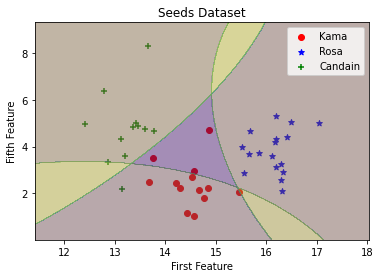

In [48]:
#____________________________________________________________ploting correct&wrong points__________________________________________________________________________
plotData(x_test,np.array(y_test),[1,2,3], {1: 'Kama', 2: 'Rosa',3: 'Candain'})

#plotting the 3 region classifiers
plotRegions(main_fun(SVC(),1,nfit=True), x_test)
plotRegions(main_fun(SVC(),2,nfit=True), x_test)
plotRegions(main_fun(SVC(),3,nfit=True), x_test)


Accuracy = 64.29%
[[12  0  1]
 [ 8  5  4]
 [ 2  0 10]]


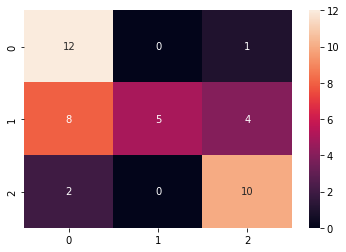

In [49]:
#------------------aplling argmax to combine the three models of Perceptron--------------------------------------
y_prb1 = main_fun(Perceptron() , 1 , accur_Per=  True)[:,1]
y_prb2 = main_fun( Perceptron() , 2 , accur_Per = True)[:,1]
y_prb3 = main_fun(Perceptron() , 3 , accur_Per = True)[:,1]
#len(y_prob3)
pred_clases = []
for i in range(len(y_prb1)):
  indx = np.argmax([y_prb1[i],y_prb2[i],y_prb3[i]])
  tru_inx = indx +1
  pred_clases.append(tru_inx)
#print(len(pred_clases))    

#----calculate the accuracy of the 3_binary classifiers of Perceptron---------------------------
Per_acc = sum(1 for x,y in zip(pred_clases,y_test) if x == y) / float(len(pred_clases))
#print(Per_acc)
print("Accuracy = {:.2f}%".format(Per_acc*100))
YYY =confusion_matrix(y_test, pred_clases)
print (YYY)
import seaborn as sns
sns.heatmap(YYY, annot=True)


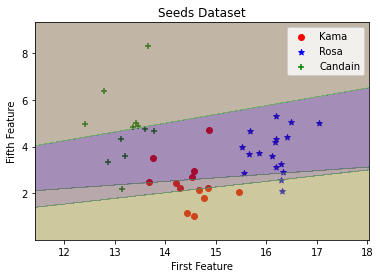

In [50]:
#____________________________________________________________ploting correct&wrong points__________________________________________________________________________
plotData(x_test,np.array(y_test),[1,2,3], {1: 'Kama', 2: 'Rosa',3: 'Candain'})

#plotting the 3 region classifiers for perceptron
plotRegions(main_fun(Perceptron(),1,nfit=True), x_test)
plotRegions(main_fun(Perceptron(),2,nfit=True), x_test)
plotRegions(main_fun(Perceptron(),3,nfit=True), x_test)

# Plotting correct and wrong prediction points

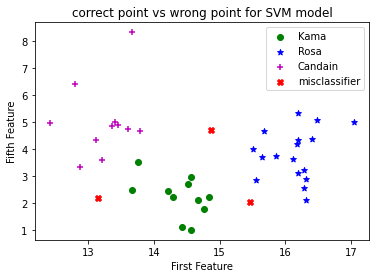

In [53]:
# this section to identify the misclassified points for SVM to be able to plot them on the graph
ypred_tot = y_test[:]
for i in range(len(pred_classes)):
  if pred_classes[i] != ypred_tot[i] :
    ypred_tot[i] = 4
#-----------------------------------plotting--------------------------------
cls= [1,2,3,4]
colors = ['g', 'b', 'm','r']
markers = ['o', '*', '+' ,'X']
class_names ={1: 'Kama', 2: 'Rosa',3: 'Candain',4:'misclassifier'}
for class_index in range(len(cls)):
  plt.scatter(x_test[np.array(ypred_tot) == cls[class_index],0], x_test[np.array(ypred_tot) == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
Title = "correct point vs wrong point for SVM model"
plt.title(Title)
plt.xlabel('First Feature')
plt.ylabel('Fifth Feature')
plt.legend()

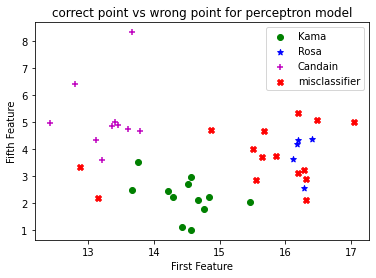

In [54]:
# this section to identify the misclassified pointsfor perceptron model to be able to plot them on the graph
ypred_tot2 = y_test[:]
for i in range(len(pred_clases)):
  if pred_clases[i] != ypred_tot2[i] :
    ypred_tot2[i] = 4
#----------------------------------------------------------------------------------
cls= [1,2,3,4]
colors = ['g', 'b', 'm','r']
markers = ['o', '*', '+' ,'X']
class_names ={1: 'Kama', 2: 'Rosa',3: 'Candain',4:'misclassifier'}
for class_index in range(len(cls)):
  plt.scatter(x_test[np.array(ypred_tot2) == cls[class_index],0], x_test[np.array(ypred_tot2) == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
Title = "correct point vs wrong point for perceptron model"
plt.title(Title)
plt.xlabel('First Feature')
plt.ylabel('Fifth Feature')
plt.legend()